In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

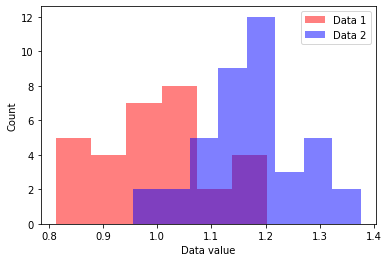

In [9]:
n_1 = 30
n_2 = 40
mean_1 = 1
mean_2 = 1.2

data_1 = mean_1 + np.random.randn(n_1) / 10
data_2 = mean_2 + np.random.randn(n_2) / 10

plt.hist(data_1, bins='fd', color=[1, 0, 0, 0.5], label='Data 1')
plt.hist(data_2, bins='fd', color=[0, 0, 1, 0.5], label='Data 2')
plt.xlabel('Data value')
plt.ylabel('Count')
plt.legend()
plt.show()

In [10]:
t_value, p_value = stats.ttest_ind(data_1, data_2, equal_var=True)

df = n_1 + n_2 - 2

print(f't_value({df}) = {t_value}, p_value={p_value}')

t_value(68) = -7.777919340496492, p_value=5.5462820519100225e-11


In [14]:
mean_diffs = np.linspace(-3, 3, 80)
pooled_variance = np.linspace(.5, 4, 100)

n_1 = 40
n_2 = 30

all_t_values = np.zeros((len(mean_diffs), len(pooled_variance)))

for mean_i in range(len(mean_diffs)):
    for var_i in range(len(pooled_variance)):
        
        df = n_1 + n_2 - 2
        s  = np.sqrt(((n_1 - 1) * pooled_variance[var_i] + (n_2 - 1) * pooled_variance[var_i]) / df)
        t_den = s * np.sqrt(1 / n_1 + 1 / n_2)

        all_t_values[mean_i, var_i] = mean_diffs[mean_i] / t_den

all_t_values[0][:5]

array([-17.56620131, -16.97627963, -16.44206009, -15.95529469,
       -15.50934984])

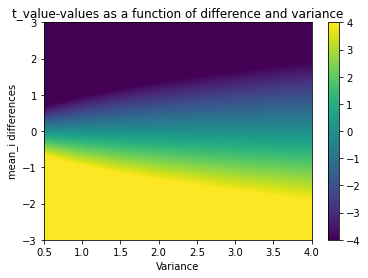

In [15]:
plt.imshow(all_t_values, vmin=-4, vmax=4, extent=[pooled_variance[0], pooled_variance[-1], mean_diffs[0], mean_diffs[-1]], aspect='auto')
plt.xlabel('Variance')
plt.ylabel('mean_i differences')
plt.colorbar()
plt.title('t_value-values as a function of difference and variance')
plt.show()